### Import Libraries

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

### Load data

In [39]:
# Read the dataset
df = pd.read_csv('emotions.csv')
df.head()

,text,label
0,i feel so pissed off over an old friend and so...,anger
1,ive found it has made a huge difference especi...,anger
2,i also feel it is unfortunate that nearly all ...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was...,sadness


In [40]:
df.info

<bound method DataFrame.info of                                                     text    label
0      i feel so pissed off over an old friend and so...    anger
1      ive found it has made a huge difference especi...    anger
2      i also feel it is unfortunate that nearly all ...  sadness
3                       i feel petty a href http clairee    anger
4      i used to believe that a feeling like fear was...  sadness
...                                                  ...      ...
19995  i was i might be buying stuff from there but i...      joy
19996  i like sonam deepika and genelia who i feel ar...      joy
19997  i feel pathetic that i can hardly go a whole d...  sadness
19998  id have spent more time with her on reading i ...  sadness
19999  i do however feel like one of those pathetic g...  sadness

[20000 rows x 2 columns]>

In [41]:
# unique labels
labels_name= df['label'].unique()
labels_name

array(['anger', 'sadness', 'joy', 'love', 'fear', 'surprise'],
      dtype=object)

In [42]:
# Number of classes
num_of_classes = len(labels_name)
print('Total count of the unique labels are ',num_of_classes)

Total count of the unique labels are  6


### Preprocessing

In [43]:
# Tokenization
max_words = 20000
tokenizer = Tokenizer(num_words=max_words,oov_token="<OOV>")

# fit the tokenizer on text data to build vocabulary
tokenizer.fit_on_texts(df['text'])

# Convert text to sequnces of integers
X = tokenizer.texts_to_sequences(df['text'])
print(X[0])

[2, 3, 15, 514, 162, 116, 77, 275, 278, 4, 69, 179]


In [44]:
# Padding the sequences to uniform lengths
maxlen=100
X = pad_sequences(X, padding='post', maxlen=maxlen)
print('Pad sequnce')
print(X)

vocab_size = len(tokenizer.word_index) + 1 # adding 1 for token padding (i.e. index zero)
print('Vocabulary size',vocab_size)


Pad sequnce
[[  2   3  15 ...   0   0   0]
 [ 74 323  13 ...   0   0   0]
 [  2 117   3 ...   0   0   0]
 ...
 [  2   3 580 ...   0   0   0]
 [248  20 405 ...   0   0   0]
 [  2  39 599 ...   0   0   0]]
Vocabulary size 17098


In [45]:
list(tokenizer.word_index.items())[:20]

[('<OOV>', 1),
 ('i', 2),
 ('feel', 3),
 ('and', 4),
 ('to', 5),
 ('the', 6),
 ('a', 7),
 ('feeling', 8),
 ('that', 9),
 ('of', 10),
 ('my', 11),
 ('in', 12),
 ('it', 13),
 ('like', 14),
 ('so', 15),
 ('im', 16),
 ('for', 17),
 ('me', 18),
 ('was', 19),
 ('have', 20)]

In [46]:
# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
print(y)

#One-Hot Encode the labels
y = to_categorical(y)
print(y)

[0 0 4 ... 4 4 4]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [47]:
#train,test-split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Shape of the training data: {x_train.shape},{y_train.shape}')
print(f'Shape of the test data: {x_test.shape},{y_test.shape}')
print(f'Shape of the test data: {x_val.shape},{y_val.shape}')


Shape of the training data: (12800, 100),(12800, 6)
Shape of the test data: (4000, 100),(4000, 6)
Shape of the test data: (3200, 100),(3200, 6)


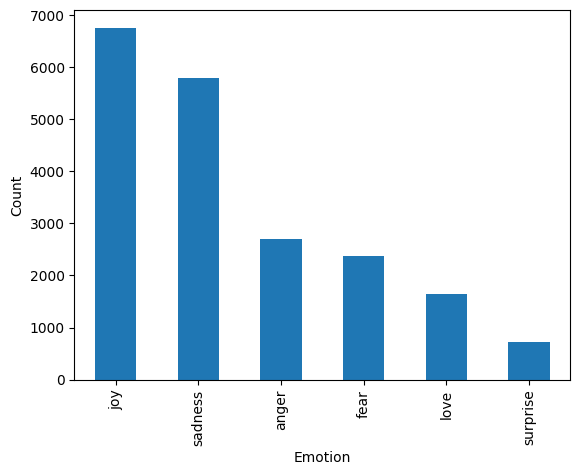

In [48]:
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


### Create model

In [49]:
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(128, activation='tanh', kernel_regularizer=l2(0.01))),
    Dropout(0.2), 
    Dense(num_of_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


### Train the model

In [50]:

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val)) 

Epoch 1/10
400/400 [==============================] - 130s 276ms/step - loss: 1.7836 - accuracy: 0.3572 - val_loss: 1.3844 - val_accuracy: 0.4884
Epoch 2/10
400/400 [==============================] - 93s 232ms/step - loss: 0.9144 - accuracy: 0.6775 - val_loss: 0.7703 - val_accuracy: 0.7347
Epoch 3/10
400/400 [==============================] - 92s 229ms/step - loss: 0.5671 - accuracy: 0.8164 - val_loss: 0.6054 - val_accuracy: 0.8169
Epoch 4/10
400/400 [==============================] - 97s 242ms/step - loss: 0.3813 - accuracy: 0.8979 - val_loss: 0.5437 - val_accuracy: 0.8381
Epoch 5/10
400/400 [==============================] - 78s 196ms/step - loss: 0.2963 - accuracy: 0.9257 - val_loss: 0.4652 - val_accuracy: 0.8647
Epoch 6/10
400/400 [==============================] - 71s 176ms/step - loss: 0.2333 - accuracy: 0.9437 - val_loss: 0.4409 - val_accuracy: 0.8728
Epoch 7/10
400/400 [==============================] - 70s 176ms/step - loss: 0.2273 - accuracy: 0.9445 - val_loss: 0.5115 - val_a

### Visualize the model performance

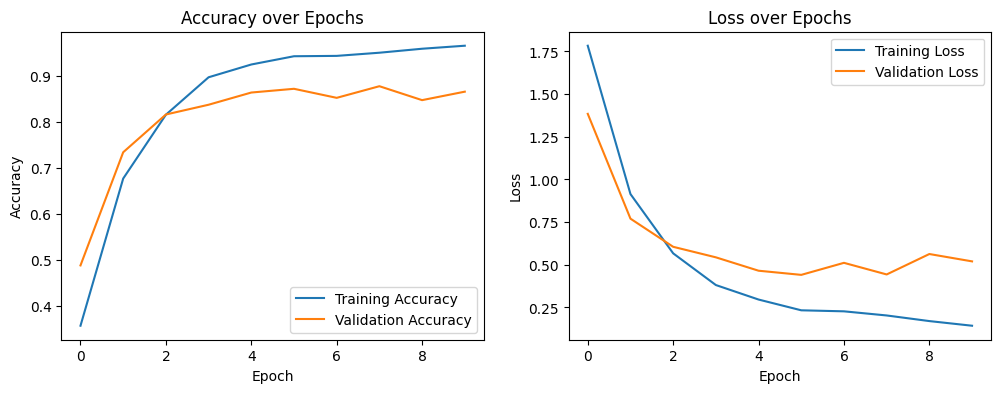

In [51]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Evaluate on the test set

In [52]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

125/125 - 7s - loss: 0.4834 - accuracy: 0.8752 - 7s/epoch - 56ms/step
Test Loss: 0.4834
Test Accuracy: 0.8752


In [53]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

125/125 [==============================] - 9s 58ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       530
           1       0.88      0.85      0.86       496
           2       0.88      0.92      0.90      1369
           3       0.74      0.73      0.74       326
           4       0.97      0.87      0.92      1149
           5       0.73      0.68      0.70       130

    accuracy                           0.88      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.88      0.88      0.88      4000



### Frågor:



### Motivera din modellarkitektur och val av relevanta hyperparametrar.

#### Model Architecture:

- Embeddeb layer is used to convert word indices into fixed size vectors to repersent the word in the text 
- Bidirectional LSTM allows the model to consider the context of words both backward and forward in the sequence, potentially improving text understanding.
- Dropout is used to prevent the overfitting during training.
- Dense layer with softmax activation function is used to produce the output in the form of probablilities for each class.
- Adam optimizer is used with a leraning rate of 0.001 is used to control the step size at each iteration.

#### Hyperparmeters:

- Embedding_dim is set to 100 and can be adjusted based on training data and problem complexity.
- LSTM units is set to 128 and can be adjusted based on data complexity and model performance.
- L2 regularization with 0.01 is applied to the LSTM layer and it controls the amount of regularisation applied to the weights.
- Dropout rate is set to 0.2,chosen to avoid the overfitting.
- Batch size is set to 32, chosen to balance taining speed and memory usage. 
- Learning rate with 0.001 is used in Adam optimiser.


### Vilka aktiveringsfunktioner har du använt? Varför?

- The activation function used in the BIdirectional LSTM layer is the hyperbolic tangent (tanh) and common choice for LSTM layer as it allows the model to capture complex depndencies in the input sequences. It works well for handling the vanishing and gradient problem in long sequences.

- The activation function used in output layer is softmax and is used to generate probabilities for each class in multi class classification.


### Vilken loss funktion har du använt? Varför?

- Categorical crossentropy is used as loss function in this model. This is suitable for multi class classifiaction problems where each instance can only belong to single class.


### Har du använt någon databehandling? Motivera dina val.

- Tokenization: 

    It is used to convert text into sequnces of integers. This process assigns a unique integer to each word in the text.
- Padding: 

    It is applied to the sequences of integers to ensure a uniform input size.In this case padding is applied to the end of each sequence (padding = 'post') with a maximum length of 100.
- Label encoding:

    The labels are encoded using LabelEncoder which assigns a numerical value to each unique emotion label.Then to_categorial is applied to convert these numerical labels into one hot encoded vectors.



### Har du använt någon regulariseringsteknik? Motivera

- Dropout: 

   It is applied after Bidirectional LSTM layer with a dropout rate of 0.2 to prevent overfitting.
- L2 regularization:

   It is applied to the kernel of the Bidirectional LSTM layer with l2 regularisation of 0.01.It adds a penalty for large weights, encouraging simpler configurations, reducing overfitting risk and also enhancing generalization. 

### Hur har modellen utvärderats?

###  Är prestandan bra? Varför/ varför inte?

### Vad hade du kunnat göra för att förbättra den ytterligare?

### Generativ AI har blivit stort inom text. Beskriv skillnaden mellan generativ ai och mer traditionell ai